In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler

In [2]:
#Load dataset
data = pd.read_csv('CHC_2017.csv', sep = ";")
type(data)

pandas.core.frame.DataFrame

In [3]:
#Select needed features
features = data[['P17S3','P17S7','P26_1','P22','P8','P30_1','P9R','P16S9','P28R','P16S6','P29','P31','P33_1','P24','P32']]
features['P32'].value_counts() 

     3893
1    3823
2    1822
Name: P32, dtype: int64

In [4]:
features.count()

P17S3    9538
P17S7    9538
P26_1    9538
P22      9538
P8       9538
P30_1    9538
P9R      9538
P16S9    9538
P28R     9538
P16S6    9538
P29      9538
P31      9538
P33_1    9538
P24      9538
P32      9538
dtype: int64

In [5]:
#Replacing specific columns and then replace remainin blank spaces for nan (Cleaning data)

features['P17S3'] = features['P17S3'].replace(' ', 0)
features['P17S7'] = features['P17S7'].replace(' ', 0)
features['P26_1'] = features['P26_1'].replace(' ', 7)


for k in features.columns:
    features[k] = features[k].replace(' ', np.nan)

C:\Users\JAIRO\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\JAIRO\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\JAIRO\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [6]:
#Dropping nan observations
features = features.dropna(axis=0)
features.head(10)

,P17S3,P17S7,P26_1,P22,P8,P30_1,P9R,P16S9,P28R,P16S6,P29,P31,P33_1,P24,P32
1,0,0,3,4,38,3,2,4,2,2,8,1,2,10,1
19,0,0,3,1,40,3,1,4,3,4,1,1,1,10,1
21,0,0,4,7,58,1,1,4,4,4,3,1,2,7,1
27,0,0,3,7,28,3,1,4,3,4,9,1,1,7,1
29,0,0,4,7,30,6,1,4,3,2,8,1,2,10,1
30,0,0,3,7,34,3,1,4,3,4,4,1,2,5,2
35,0,0,3,4,61,6,1,4,3,4,1,1,1,10,1
39,0,0,3,4,53,1,2,4,3,4,5,1,2,1,1
40,0,0,3,2,59,6,1,2,2,4,9,1,2,1,1
43,0,0,3,7,50,6,2,4,2,4,4,1,2,1,1


In [7]:
features.count()

P17S3    5152
P17S7    5152
P26_1    5152
P22      5152
P8       5152
P30_1    5152
P9R      5152
P16S9    5152
P28R     5152
P16S6    5152
P29      5152
P31      5152
P33_1    5152
P24      5152
P32      5152
dtype: int64

[Text(0, 0, 'Hombre'), Text(0, 0, 'Mujer')]

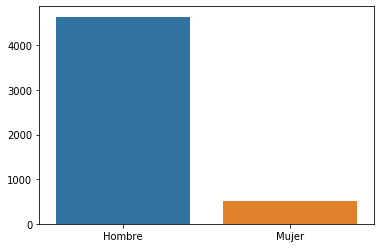

In [9]:
#Descriptive plots
Age_feat = features['P9R'].astype('int64').value_counts()
g = sns.barplot(y=Age_feat.values, x=Age_feat.index)
g.set_xticklabels(["Hombre","Mujer"])

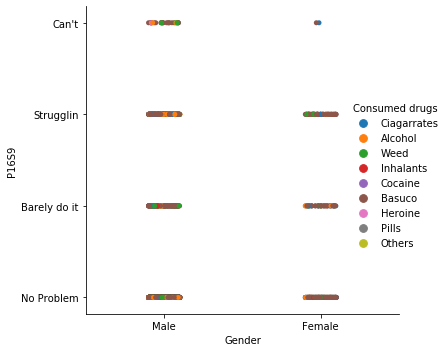

In [10]:
g = sns.catplot(x="P9R", y="P16S9", hue='P30_1', data=features, orient="v").set_axis_labels("Gender", "P16S9").set_xticklabels(["Male","Female"]).set_yticklabels(["No Problem","Barely do it","Strugglin","Can't"])

hue_title = 'Consumed drugs'
g._legend.set_title(hue_title)
g

new_labels = ['Ciagarrates', 'Alcohol', 'Weed', 'Inhalants', 'Cocaine', 'Basuco', 'Heroine', 'Pills', 'Others']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g

[Text(0, 0, 'Cigar'),
 Text(0, 0, 'Alcohol'),
 Text(0, 0, 'Weed'),
 Text(0, 0, 'Inhal'),
 Text(0, 0, 'Coca'),
 Text(0, 0, 'Basuco'),
 Text(0, 0, 'Heroi'),
 Text(0, 0, 'Pills'),
 Text(0, 0, 'Others')]

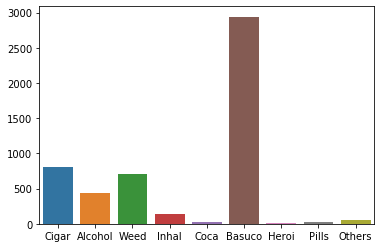

In [11]:
bars = sns.barplot(y=features['P30_1'].astype('int64').value_counts().values, x=features['P30_1'].astype('int64').value_counts().index)
bars.set_xticklabels(['Cigar', 'Alcohol', 'Weed', 'Inhal', 'Coca', 'Basuco', 'Heroi', 'Pills', 'Others'])

In [12]:
#Define label, features and convert to numpy array
X = features[['P17S3','P17S7','P26_1','P22','P8','P30_1','P9R','P16S9','P28R','P16S6','P29','P31','P33_1','P24']].astype(float)
y =  features['P32'].values

In [13]:
#Undersampling
from collections import Counter
X = np.asarray(X)
rus = RandomUnderSampler(random_state=14)
X, y = rus.fit_resample(X, y)

In [21]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float)) #Standardization with mean 0 and standard deviation 1
y=y.astype(int) #object parse as int

In [22]:
#Creating train/test sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=14)
print ('Train set shape:', X_train.shape,  y_train.shape)
print ('Test set shape:', X_test.shape,  y_test.shape)

Train set shape: (2760, 14) (2760,)
Test set shape: (690, 14) (690,)


In [41]:
#ROC Curve
import matplotlib.pyplot as plt
from sklearn import metrics
def createROC(y_test, y_pred):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)
    roc_auc = metrics.auc(fpr,tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [24]:
## FIRST TECHNIQUE: KNN
#train, predict and implements metrics for a knn model
k = 100
mean_acc = np.zeros((k-1))
std_acc = np.zeros((k-1))
for i in range(1,k):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[i-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.64782609, 0.64927536, 0.66811594, 0.65797101, 0.6942029 ,
       0.69565217, 0.69565217, 0.69130435, 0.69565217, 0.69565217,
       0.70434783, 0.69710145, 0.69565217, 0.70434783, 0.70144928,
       0.70724638, 0.70434783, 0.71449275, 0.70869565, 0.7173913 ,
       0.71594203, 0.72028986, 0.7115942 , 0.71884058, 0.71884058,
       0.72318841, 0.72898551, 0.72753623, 0.72753623, 0.72173913,
       0.72608696, 0.72463768, 0.7173913 , 0.72318841, 0.72608696,
       0.72753623, 0.73768116, 0.73768116, 0.73188406, 0.73188406,
       0.73188406, 0.73043478, 0.73478261, 0.73478261, 0.73478261,
       0.74057971, 0.72898551, 0.73043478, 0.72173913, 0.72753623,
       0.72608696, 0.72463768, 0.72608696, 0.72898551, 0.72898551,
       0.73043478, 0.72463768, 0.72898551, 0.72318841, 0.72753623,
       0.72318841, 0.72173913, 0.72173913, 0.72318841, 0.72608696,
       0.72028986, 0.71304348, 0.7173913 , 0.71449275, 0.71884058,
       0.71449275, 0.71449275, 0.70869565, 0.71594203, 0.71159

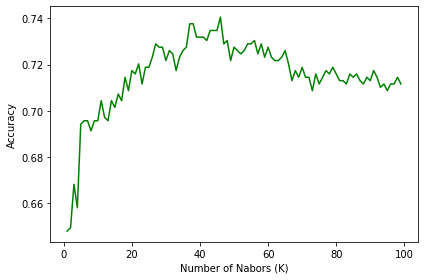

In [25]:
plt.plot(range(1,k),mean_acc,'g')
plt.ylabel('Accuracy')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [26]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7405797101449275 with k= 46


In [27]:
print(yhat[0:5]) #some predictions
print(y_test[0:5])

[2 2 2 1 1]
[2 1 2 1 1]


In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[270  91]
 [108 221]]


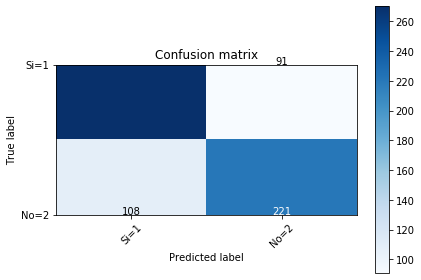

In [29]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Si=1','No=2'],normalize= False,  title='Confusion matrix')

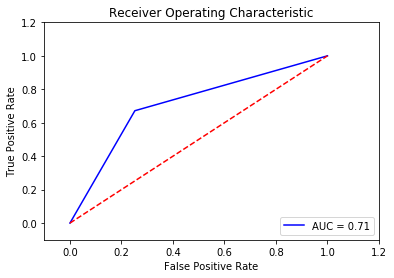

In [42]:
createROC(y_test, yhat)

In [44]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.71      0.75      0.73       361
           2       0.71      0.67      0.69       329

    accuracy                           0.71       690
   macro avg       0.71      0.71      0.71       690
weighted avg       0.71      0.71      0.71       690



In [45]:
## SECOND TECHNIQUE: DECISION TREE
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(criterion="entropy")
Tree # it shows the default parameter

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [46]:
Tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [47]:
predTree = Tree.predict(X_test) 
print (predTree [0:5]) #some predictions
print (y_test [0:5])

[2 1 2 1 1]
[2 1 2 1 1]


In [48]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.663768115942029


Confusion matrix, without normalization
[[242 119]
 [113 216]]


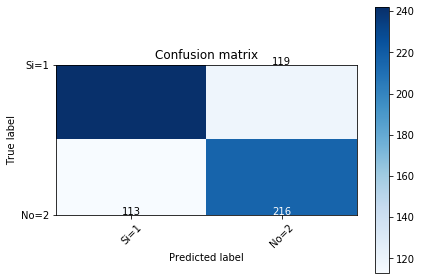

In [49]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predTree, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Si=1','No=2'],normalize= False,  title='Confusion matrix')

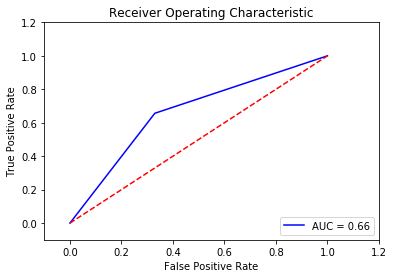

In [52]:
createROC(y_test, predTree)

In [50]:
print (classification_report(y_test, predTree))

              precision    recall  f1-score   support

           1       0.68      0.67      0.68       361
           2       0.64      0.66      0.65       329

    accuracy                           0.66       690
   macro avg       0.66      0.66      0.66       690
weighted avg       0.66      0.66      0.66       690



In [53]:
## THIRD TECHNIQUE: LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_similarity_score

C_param_range = [0.001,0.01,0.1,1,10,100]
y_hat_1 =[]
results = []
for k in C_param_range:
    y_hat_1 = LogisticRegression(C=k, solver='liblinear').fit(X_train,y_train).predict(X_test)
    results.append(jaccard_similarity_score(y_test, y_hat_1))

C:\Users\JAIRO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\Users\JAIRO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\Users\JAIRO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior 

In [54]:
results

[0.7188405797101449,
 0.7159420289855073,
 0.7144927536231884,
 0.7144927536231884,
 0.7144927536231884,
 0.7144927536231884]

In [55]:
resultsnp = np.asarray(results)
y_hat = LogisticRegression(C=C_param_range[resultsnp.argmax()], solver='liblinear').fit(X_train,y_train).predict(X_test)
jaccard_similarity_score(y_test, y_hat)

C:\Users\JAIRO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.7188405797101449

In [56]:
print (y_hat [0:5]) #some predictions
print (y_test [0:5])

[2 2 2 1 1]
[2 1 2 1 1]


Confusion matrix, without normalization
[[272  89]
 [105 224]]


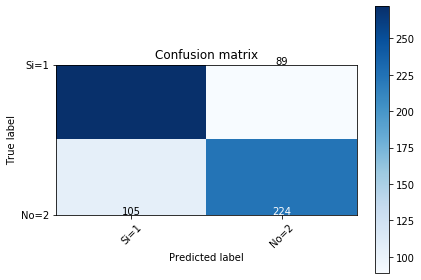

In [57]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Si=1','No=2'],normalize= False,  title='Confusion matrix')

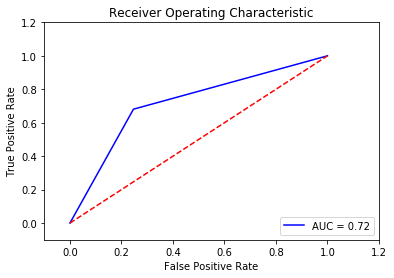

In [59]:
createROC(y_test, y_hat)

In [58]:
print (classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           1       0.72      0.75      0.74       361
           2       0.72      0.68      0.70       329

    accuracy                           0.72       690
   macro avg       0.72      0.72      0.72       690
weighted avg       0.72      0.72      0.72       690



In [70]:
from sklearn.metrics import log_loss
model = LogisticRegression(C=C_param_range[resultsnp.argmax()], solver='liblinear').fit(X_train,y_train)
yhat_prob = model.predict_proba(X_test)
loss = log_loss(y_test, yhat_prob)
print("Log loss score: "+ str(loss) )

Log loss score: 0.63856250139381


In [71]:
## THIRD TECHNIQUE: SUPPORT VECTOR MACHINE
#Trying some kernels
from sklearn import svm
kernels_name = ['linear','poly','rbf','sigmoid']
y_hat_2 =[]
results_2 = []
for j in kernels_name:
    y_hat_2 = svm.SVC(kernel = j).fit(X_train,y_train).predict(X_test)
    print (classification_report(y_test, y_hat_2))
    


              precision    recall  f1-score   support

           1       0.73      0.80      0.76       361
           2       0.75      0.68      0.72       329

    accuracy                           0.74       690
   macro avg       0.74      0.74      0.74       690
weighted avg       0.74      0.74      0.74       690



C:\Users\JAIRO\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           1       0.73      0.75      0.74       361
           2       0.72      0.70      0.71       329

    accuracy                           0.72       690
   macro avg       0.72      0.72      0.72       690
weighted avg       0.72      0.72      0.72       690



C:\Users\JAIRO\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           1       0.74      0.75      0.75       361
           2       0.72      0.71      0.72       329

    accuracy                           0.73       690
   macro avg       0.73      0.73      0.73       690
weighted avg       0.73      0.73      0.73       690



C:\Users\JAIRO\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           1       0.64      0.54      0.59       361
           2       0.57      0.67      0.62       329

    accuracy                           0.60       690
   macro avg       0.61      0.61      0.60       690
weighted avg       0.61      0.60      0.60       690



In [73]:
clf_lin = svm.SVC(kernel='linear')
clf_lin.fit(X_train, y_train) 
y_hat_lin = clf_lin.predict(X_test)
print (classification_report(y_test, y_hat_lin))

              precision    recall  f1-score   support

           1       0.73      0.80      0.76       361
           2       0.75      0.68      0.72       329

    accuracy                           0.74       690
   macro avg       0.74      0.74      0.74       690
weighted avg       0.74      0.74      0.74       690



Confusion matrix, without normalization
[[288  73]
 [105 224]]


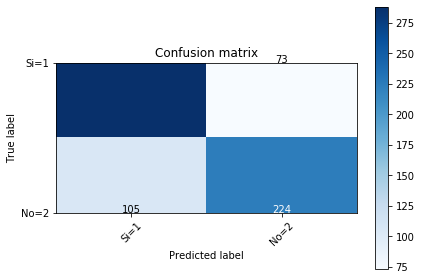

In [74]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat_lin, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Si=1','No=2'],normalize= False,  title='Confusion matrix')

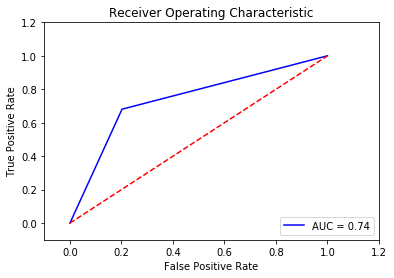

In [75]:
createROC(y_test, y_hat_lin)